In [198]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.preprocessing import LabelEncoder

In [199]:
data = 'https://github.com/iMnuelll/Bangkit_Capstone/raw/main/Data%20Dummy/new_dummy.csv'
df = pd.read_csv(data, sep='|')

In [200]:
df.head(150)

,name,gender,age,job,task,work_days,difficulty,average_work_hour,average_rest,mood_before_work,mood_after_work,deadline,importance,sleep_average,urgency,total_gangguan,productive_time
0,"Galih Lazuardi, M.TI.",0,40,2,6,5,1,9,35,1,0,3,3,8,3,3,0
1,Sabar Sudiati,0,30,1,5,5,1,7,25,2,2,4,4,6,1,1,0
2,Lantar Astuti,0,31,2,5,5,2,8,33,0,2,4,3,7,1,5,0
3,Ratih Simbolon,0,39,4,5,7,4,6,29,1,0,3,1,7,1,5,0
4,Teddy Hutagalung,1,31,4,3,7,4,8,37,1,0,4,4,8,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"Tami Prayoga, S.T.",0,15,3,5,5,5,5,33,1,2,1,5,6,5,0,2
146,"Galar Irawan, S.Pt",0,24,4,5,7,3,5,18,2,0,3,1,8,5,3,2
147,Chelsea Haryanto,0,16,0,5,4,3,7,29,1,1,0,4,6,3,3,2
148,Ibrani Wacana,0,27,2,3,5,2,8,22,0,0,1,5,8,5,5,2


In [201]:
df = df.drop(columns=['name'])

**Fungsi Visualisasi Data**

In [202]:
def scatterPlot(columnName, describe='mean'):
    mean_value = columnName.mean()
    median_value = columnName.median()

    plt.figure(figsize=(10, 5))
    plt.scatter(df.index, columnName)
    if describe == 'mean' :
      plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean ({mean_value:.2f})')
    elif describe == 'median' :
      plt.axhline(median_value, color='red', linestyle='--', label=f'Median ({median_value:.2f})')
    plt.title(f'Scatter Plot of {columnName.name}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

**Visualisasi Kolom :**
1. average_work_hour
2. average_rest
3. work_days

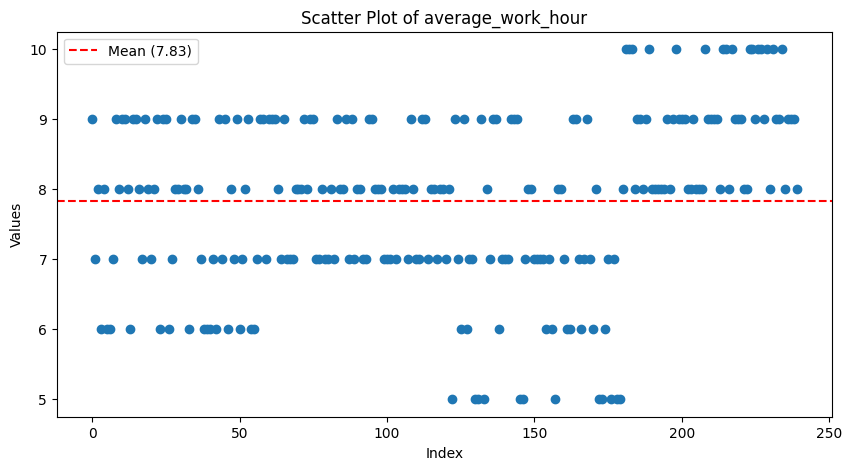

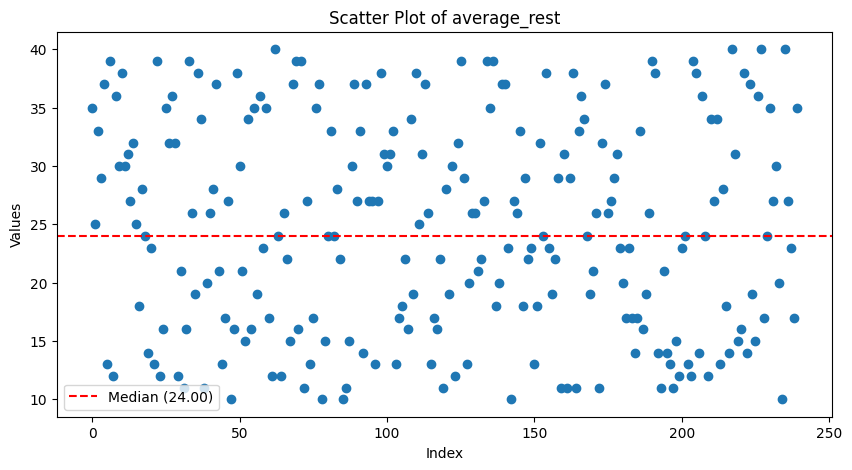

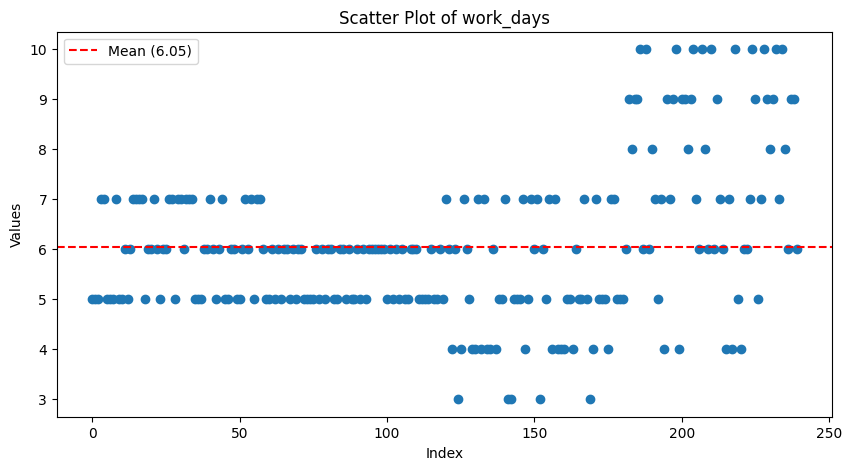

In [203]:
scatterPlot(df['average_work_hour'])
scatterPlot(df['average_rest'], 'median')
scatterPlot(df['work_days'])

**Menjumlahkan Total Gangguan**

In [204]:
df['total_gangguan'].describe()

count    240.000000
mean       3.258333
std        2.069891
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        7.000000
Name: total_gangguan, dtype: float64

## **Handle Ouliers**

In [205]:
# def handle_outliers(df, column_name):
#     # Menghitung Q1 (25th percentile) dan Q3 (75th percentile)
#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     # Menghitung IQR (Interquartile Range)
#     IQR = Q3 - Q1
#     # Menentukan batas bawah dan batas atas untuk mendeteksi outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     print(f"Lower Bound: {lower_bound}")
#     print(f"Upper Bound: {upper_bound}")

#     # Mengganti nilai outliers dengan NaN
#     df[column_name] = np.where((df[column_name] < lower_bound) | (df[column_name] > upper_bound), np.nan, df[column_name])

#     # Mengganti NaN dengan median
#     median = df[column_name].median()
#     df[column_name].fillna(median, inplace=True)

#     return df

# handle_outliers(df, 'average_rest')
# handle_outliers(df, 'work_days')

# df['average_rest'].describe()
# df['work_days'].describe()

In [206]:
def normalize_average_rest(rest) :
  if 10 <= rest >= 15 :
    return rest / 10
  elif 15 > rest <= 20 :
    return rest / 20
  elif 20 > rest <= 30 :
    return rest / 30
  elif 30 > rest <= 40 :
    return rest / 40
  else :
    return rest

def normalize_work_days(day) :
  if 8 <= day <= 10 :
    return random.randint(1, 7)
  else :
    return day

In [207]:
df['average_rest'] = [normalize_average_rest(rest) for rest in df['average_rest']]

In [208]:
df['average_rest'].describe()

count    240.000000
mean       2.351042
std        1.084239
min        0.500000
25%        1.600000
50%        2.400000
75%        3.300000
max        4.000000
Name: average_rest, dtype: float64

In [209]:
df['work_days'] = [normalize_work_days(day) for day in df['work_days']]

In [210]:
df['work_days'].describe()

count    240.000000
mean       5.412500
std        1.227581
min        1.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: work_days, dtype: float64

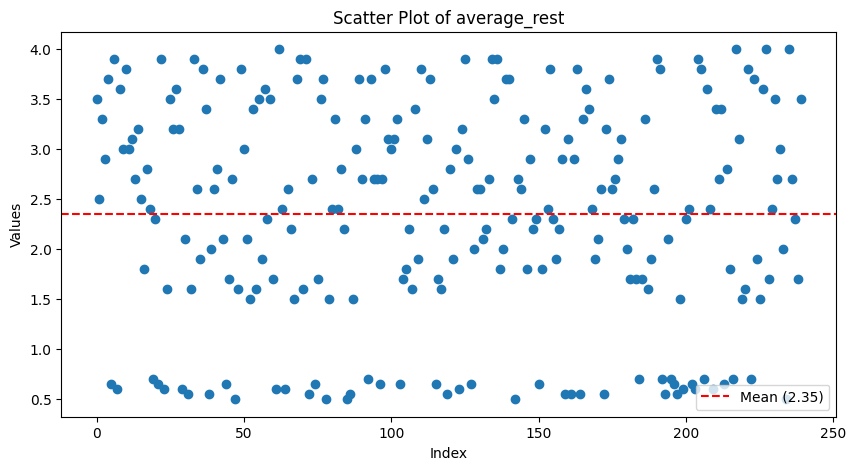

In [211]:
scatterPlot(df['average_rest'])

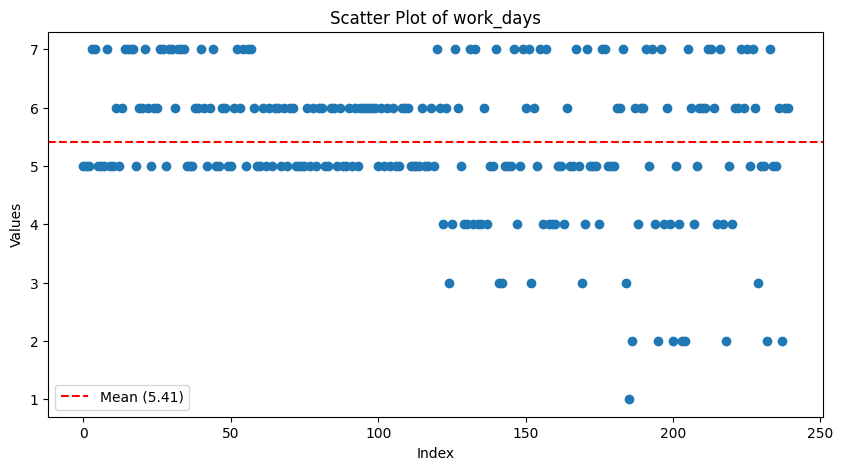

In [212]:
scatterPlot(df['work_days'])

**Kategorisasi Hari Kerja**

In [213]:
df['work_days'].astype(int)

0      5
1      5
2      5
3      7
4      7
      ..
235    5
236    6
237    2
238    6
239    6
Name: work_days, Length: 240, dtype: int64

In [214]:
def categorize_days(day):
    if 1 <= day <= 3:
        return "1 - 3 hari"
    elif day == 4:
        return "2 - 4 hari"
    elif day == 5:
        return "3 - 5 hari"
    elif day == 6:
        return "4 - 6 hari"
    elif day == 7:
        return "5 - 7 hari"
    else:
        return "Unknown category"

df['work_days_category'] = [categorize_days(day) for day in df['work_days']]
df['work_days_category_int'] = df['work_days_category'].str.extract(r'(\d+)\s*hari$')
df['work_days_category_int'] = df['work_days_category_int'].astype(int)

In [215]:
df['work_days_category'].isnull().sum()

0

In [216]:
df.head(200)

,gender,age,job,task,work_days,difficulty,average_work_hour,average_rest,mood_before_work,mood_after_work,deadline,importance,sleep_average,urgency,total_gangguan,productive_time,work_days_category,work_days_category_int
0,0,40,2,6,5,1,9,3.50,1,0,3,3,8,3,3,0,3 - 5 hari,5
1,0,30,1,5,5,1,7,2.50,2,2,4,4,6,1,1,0,3 - 5 hari,5
2,0,31,2,5,5,2,8,3.30,0,2,4,3,7,1,5,0,3 - 5 hari,5
3,0,39,4,5,7,4,6,2.90,1,0,3,1,7,1,5,0,5 - 7 hari,7
4,1,31,4,3,7,4,8,3.70,1,0,4,4,8,3,0,0,5 - 7 hari,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,41,3,1,2,5,9,0.70,1,2,0,3,6,1,2,3,1 - 3 hari,3
196,0,49,0,6,7,3,8,0.65,0,1,0,3,3,3,6,3,5 - 7 hari,7
197,0,37,1,0,4,2,9,0.55,2,2,0,3,5,1,4,3,2 - 4 hari,4
198,0,31,4,2,6,5,10,1.50,1,0,1,5,6,3,4,3,4 - 6 hari,6


In [217]:
df['work_days_category_int'].describe()

count    240.000000
mean       5.454167
std        1.119429
min        3.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: work_days_category_int, dtype: float64

**Kalikan hari kerja dengan rata - rata jam kerja**

In [218]:
df['work_hour_in_week'] = df['work_days_category_int'] * df['average_work_hour']

In [219]:
df['work_hour_in_week'].describe()

count    240.000000
mean      42.645833
std       11.068236
min       20.000000
25%       35.000000
50%       42.000000
75%       49.000000
max       70.000000
Name: work_hour_in_week, dtype: float64

## **Kategori jam kerja dalam 1 minggu :**

1.   Paruh Waktu < 35 jam
2.   Normal 35 <= 40 jam
3.   Lembur > 40 jam



In [220]:
def work_hour_in_week(hours):

    if hours < 35 :
      return "Paruh Waktu"
    elif 35 <= hours <= 40 :
      return "Normal"
    elif hours > 40 :
      return "Lembur"

df['categorize_work_hour_in_week'] = df['work_hour_in_week'].apply(work_hour_in_week)

In [221]:
df['categorize_work_hour_in_week'].head(100)

0     Lembur
1     Normal
2     Normal
3     Lembur
4     Lembur
       ...  
95    Lembur
96    Lembur
97    Lembur
98    Lembur
99    Lembur
Name: categorize_work_hour_in_week, Length: 100, dtype: object

## **Encode :**
1. work_days_category
2. categorize_work_hour_in_week

In [222]:
label_encoder = LabelEncoder()

df['work_hour_label'] = label_encoder.fit_transform(df['categorize_work_hour_in_week'])
df['work_days_label'] = label_encoder.fit_transform(df['work_days_category'])

**Drop Column**

In [223]:
df.columns

Index(['gender', 'age', 'job', 'task', 'work_days', 'difficulty',
       'average_work_hour', 'average_rest', 'mood_before_work',
       'mood_after_work', 'deadline', 'importance', 'sleep_average', 'urgency',
       'total_gangguan', 'productive_time', 'work_days_category',
       'work_days_category_int', 'work_hour_in_week',
       'categorize_work_hour_in_week', 'work_hour_label', 'work_days_label'],
      dtype='object')

In [224]:
df = df.drop(columns = ['work_days', 'average_work_hour', 'work_days_category', 'work_days_category_int', 'work_hour_in_week',
       'categorize_work_hour_in_week', 'work_days_label'])

**Menggabungkan DataFrame**

In [191]:
data = 'https://github.com/iMnuelll/Bangkit_Capstone/raw/main/Preprocessing/data_gform_after_flatten.csv'
df2 = pd.read_csv(data, delimiter='|')

In [193]:
df2.head(500)

,gender,age,job,task,difficulty,average_rest,mood_before_work,mood_after_work,deadline,importance,sleep_average,productive_time,urgency,total_gangguan,work_hour_label
0,0,22,1,5,4,5.0,2,1,4,1,7.0,0,2,4,2
1,0,24,0,4,3,1.0,0,0,3,1,7.0,0,3,3,0
2,0,21,1,2,3,2.0,0,0,1,1,5.0,0,1,1,2
3,0,21,1,6,4,3.0,1,1,1,2,5.0,0,2,3,0
4,0,21,1,1,3,0.5,1,0,1,2,6.0,0,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1,21,1,1,4,0.2,1,1,1,1,5.0,2,2,1,2
68,1,20,1,5,4,1.0,2,0,1,5,6.0,2,5,3,2
69,1,19,1,6,3,0.4,2,1,1,2,5.0,2,3,3,2
70,1,21,1,0,3,0.4,0,0,1,4,6.0,2,3,1,0


In [194]:
df = pd.concat([df, df2])

In [196]:
df['productive_time'].value_counts()

productive_time
0    78
1    78
2    78
3    78
Name: count, dtype: int64

In [197]:
df.to_csv('new_dummy.csv', sep='|', index=False)